# Task 1

Usted trabaja para una empresa de imágenes satelitales. Una de las cámaras en órbita tiene una
interferencia electrónica que genera un ruido sinusoidal (patrón de rayas diagonales) sobre las fotografías
de la superficie terrestre. Los filtros espaciales tradicionales (Gaussian Blur) destruyen los detalles
geográficos necesarios. Por ello usted ha decido idear una solución tomando como base fotografías que
tiene a mano con el mismo problema previo a implementar la solución real. Con esto en mente, realice:
1. Cargue la imagen periodic_noise.jpg en escala de grises.
2. Calcule la Transformada Discreta de Fourier (DFT) y desplace el componente de frecuencia cero al
centro.
3. Muestre el Espectro de Magnitud en escala logarítmica.
4. Identifique visualmente los "picos" de energía que no corresponden a la información natural de la
imagen (puntos brillantes fuera del centro).
5. Cree una máscara (Notch Filter) que bloquee específicamente esas frecuencias parásitas
(haciéndolas cero), pero preserve el resto del espectro, incluyendo el componente DC.
6. Aplique la Transformada Inversa (IDFT) para recuperar la imagen espacial.
Para esta parte se espera que entregue:
• Código funcional y visualización correcta del espectro con los picos de ruidos señalados
• Imagen restaurada exitosamente (sin rayas y con detalles nítidos)
• Explique por qué un filtro de promedio (average filter) de 5x5 en el dominio espacial hibiera sido una
mala solución para este problema específico

In [65]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


(-0.5, 511.5, 511.5, -0.5)

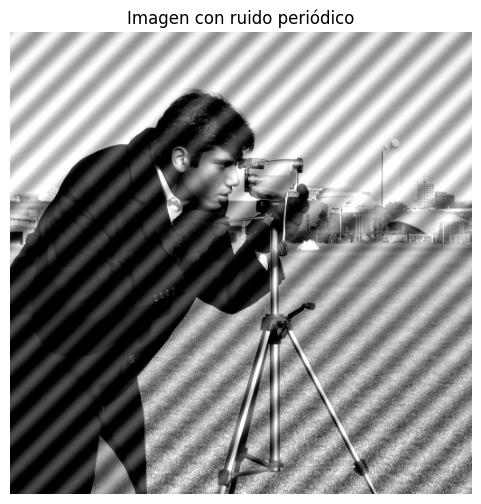

In [66]:
img = cv2.imread('periodic_noise.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(6,6))
plt.imshow(img, cmap='gray')
plt.title('Imagen con ruido periódico')
plt.axis('off')


In [ ]:
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)  # Mover frecuencia cero, centrada


(-0.5, 511.5, 511.5, -0.5)

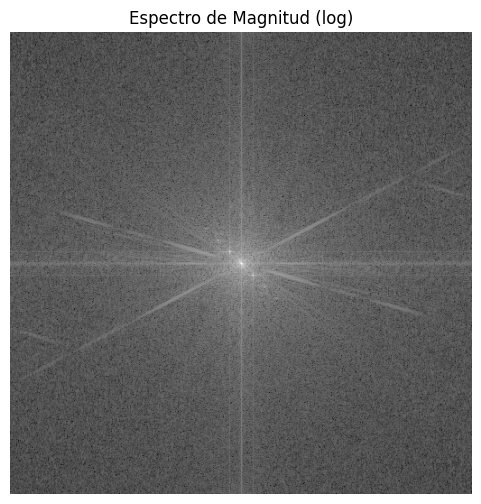

In [68]:
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]) + 1)

plt.figure(figsize=(6,6))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Espectro de Magnitud (log)')
plt.axis('off')


## se pueden observar los picos de luz tirando en forma de estrella 

In [69]:
plt.imsave('espectro.png', magnitude_spectrum, cmap='gray')


### se guardo para usar con ayuda de paint las coordenadas de los picos y con eso logramos definir que los picos son:
(218, 218),
(230, 230),
(243, 243),
(269, 269),
(282, 282),
(295, 295)

In [70]:
rows, cols = img.shape
peaks = [
    (218, 218),
    (230, 230),
    (243, 243),
    (269, 269),
    (282, 282),
    (295, 295)
]



(-0.5, 511.5, 511.5, -0.5)

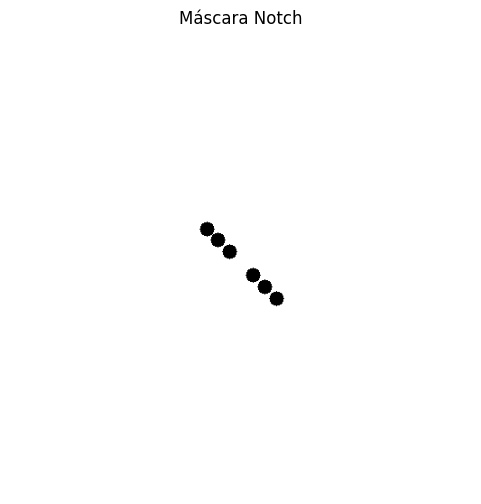

In [71]:
mask = np.ones((rows, cols, 2), np.uint8)

r = 8  # radio del notch a prueba y error
for peak in peaks:
    x, y = peak
    cv2.circle(mask, (y, x), r, (0,0,0), -1) 

plt.figure(figsize=(6,6))
plt.imshow(mask[:,:,0], cmap='gray')
plt.title('Máscara Notch')
plt.axis('off')


(-0.5, 511.5, 511.5, -0.5)

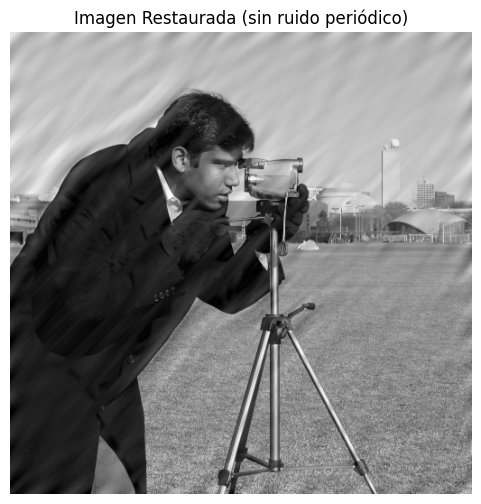

In [72]:
fshift = dft_shift * mask

# Volver a dominio espacial
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])

# Normalizar para visualizar
img_back = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX)
img_back = np.uint8(img_back)

plt.figure(figsize=(6,6))
plt.imshow(img_back, cmap='gray')
plt.title('Imagen Restaurada (sin ruido periódico)')
plt.axis('off')


## por que un filtro de promedio de 5x5 hubiera sido una mala solucion?

El filtro de promedio 5×5 reemplaza cada píxel por el valor promedio de sus vecinos, lo que produce un efecto de suavizado general en la imagen. Sin embargo, el ruido presente en este caso no era aleatorio, sino periódico y con una frecuencia bien definida.

Entonces el filtro no habría eliminado las líneas de ruido, sino que únicamente habría reducido de forma general las variaciones de intensidad en la imagen. Como este tipo de filtro tiene su respuesta máxima en las bajas frecuencias y atenúa progresivamente las altas, el resultado visual habría sido una imagen más borrosa, donde los detalles geográficos importantes se degradan, mientras que el patrón de ruido todavía sería perceptible.

En resumen, se habría perdido información útil de la imagen sin eliminar eficazmente la interferencia sinusoidal, lo que lo convierte en una solución inadecuada para este problema específico.